In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(12,5)
rcParams['axes.grid']=False


In [ ]:
def parse(x):
    return dt.strptime(x,'%Y-%m-%d')
parse(df.Bill_Date)

In [25]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv')
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,1/1/2016,365,1423.5,219.0,247.73,31
1,2/1/2016,292,1138.8,175.2,234.11,31
2,3/1/2016,130,507.0,78.0,123.85,29
3,4/1/2016,117,456.3,70.2,111.22,29
4,5/1/2016,136,530.4,81.6,118.37,29


In [4]:
df.shape

(53, 6)

In [5]:
df.size

318

In [7]:
df.columns

Index(['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount',
       'Billing_days'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bill_Date      53 non-null     object 
 1   On_peak        53 non-null     int64  
 2   Off_peak       53 non-null     float64
 3   Usage_charge   53 non-null     float64
 4   Billed_amount  53 non-null     float64
 5   Billing_days   53 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 2.6+ KB


In [9]:
df.describe()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,232.811321,1089.292453,175.957170,194.535094,30.207547
std,106.888162,411.011878,67.797382,68.951708,1.974438
min,63.000000,245.700000,37.800000,77.810000,25.000000
25%,147.000000,777.000000,128.120000,145.460000,29.000000
50%,211.000000,1103.000000,181.850000,193.490000,31.000000
75%,316.000000,1353.300000,218.870000,244.030000,31.000000
max,501.000000,2139.000000,371.610000,403.890000,34.000000


In [10]:
df.isna().sum()

Bill_Date        0
On_peak          0
Off_peak         0
Usage_charge     0
Billed_amount    0
Billing_days     0
dtype: int64

No Null values.

In [12]:
df.nunique()

Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64

In [26]:
bill_df=df.set_index("Bill_Date")
bill_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
1/1/2016,365,1423.5,219.0,247.73,31
2/1/2016,292,1138.8,175.2,234.11,31
3/1/2016,130,507.0,78.0,123.85,29
4/1/2016,117,456.3,70.2,111.22,29
5/1/2016,136,530.4,81.6,118.37,29


In [28]:
bill_2018=bill_df['1/1/2016':'12/1/2018'][['Billed_amount']]
bill_2018

,Billed_amount
Bill_Date,
1/1/2016,247.73
2/1/2016,234.11
3/1/2016,123.85
4/1/2016,111.22
5/1/2016,118.37
6/1/2016,77.81
7/1/2016,86.67
8/1/2016,122.40
9/1/2016,223.62


### Simple Moving Average

simple moving average=(t+(t-1)+(t-2)+----(t-n))/n

In [29]:
bill_2018['Billed_amount'].rolling(window=3).mean()

Bill_Date
1/1/2016            NaN
2/1/2016            NaN
3/1/2016     201.896667
4/1/2016     156.393333
5/1/2016     117.813333
6/1/2016     102.466667
7/1/2016      94.283333
8/1/2016      95.626667
9/1/2016     144.230000
10/1/2016    166.186667
11/1/2016    175.566667
12/1/2016    182.483333
1/1/2017     219.516667
2/1/2017     240.776667
3/1/2017     209.833333
4/1/2017     161.550000
5/1/2017     141.170000
6/1/2017     161.350000
7/1/2017     215.483333
8/1/2017     243.746667
9/1/2017     267.820000
10/1/2017    231.653333
11/1/2017    189.500000
12/1/2017    145.206667
1/1/2018     176.750000
2/1/2018     206.696667
3/1/2018     223.860000
4/1/2018     185.040000
5/1/2018     172.280000
6/1/2018     177.896667
7/1/2018     222.270000
8/1/2018     264.630000
9/1/2018     277.363333
10/1/2018    291.766667
11/1/2018    259.546667
12/1/2018    224.340000
Name: Billed_amount, dtype: float64

In [32]:
bill_2018['ma_rolling_3']=bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)
bill_2018

,Billed_amount,ma_rolling_3
Bill_Date,,
1/1/2016,247.73,NaN
2/1/2016,234.11,NaN
3/1/2016,123.85,NaN
4/1/2016,111.22,201.896667
5/1/2016,118.37,156.393333
6/1/2016,77.81,117.813333
7/1/2016,86.67,102.466667
8/1/2016,122.40,94.283333
9/1/2016,223.62,95.626667


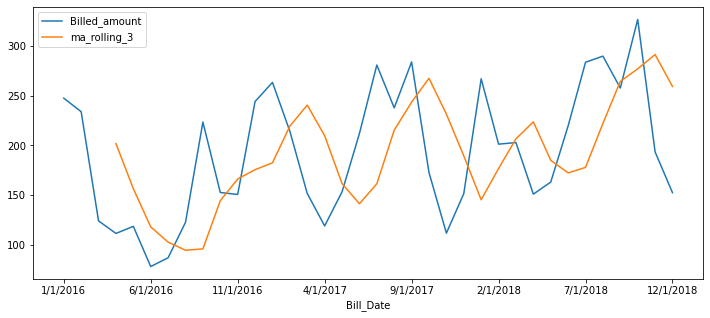

In [33]:
bill_2018.plot();

### Weighted Moving Average

In [34]:
def wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

In [35]:
bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))

Bill_Date
1/1/2016            NaN
2/1/2016            NaN
3/1/2016     181.250000
4/1/2016     135.911667
5/1/2016     116.900000
6/1/2016      96.898333
7/1/2016      89.000000
8/1/2016     103.058333
9/1/2016     167.055000
10/1/2016    171.210000
11/1/2016    163.386667
12/1/2016    197.788333
1/1/2017     238.366667
2/1/2017     235.768333
3/1/2017     191.150000
4/1/2017     145.628333
5/1/2017     141.443333
6/1/2017     176.898333
7/1/2017     236.818333
8/1/2017     248.061667
9/1/2017     268.338333
10/1/2017    220.773333
11/1/2017    160.701667
12/1/2017    141.661667
1/1/2018     202.718333
2/1/2018     215.018333
3/1/2018     213.125000
4/1/2018     176.625000
5/1/2018     165.640000
6/1/2018     189.380000
7/1/2018     242.421667
8/1/2018     276.361667
9/1/2018     273.026667
10/1/2018    297.940000
11/1/2018    248.801667
12/1/2018    195.198333
Name: Billed_amount, dtype: float64

In [36]:
bill_2018['wma_rolling_3']=bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3
Bill_Date,,,
1/1/2016,247.73,NaN,NaN
2/1/2016,234.11,NaN,NaN
3/1/2016,123.85,NaN,NaN
4/1/2016,111.22,201.896667,181.250000
5/1/2016,118.37,156.393333,135.911667
6/1/2016,77.81,117.813333,116.900000
7/1/2016,86.67,102.466667,96.898333
8/1/2016,122.40,94.283333,89.000000
9/1/2016,223.62,95.626667,103.058333


<AxesSubplot:xlabel='Bill_Date'>

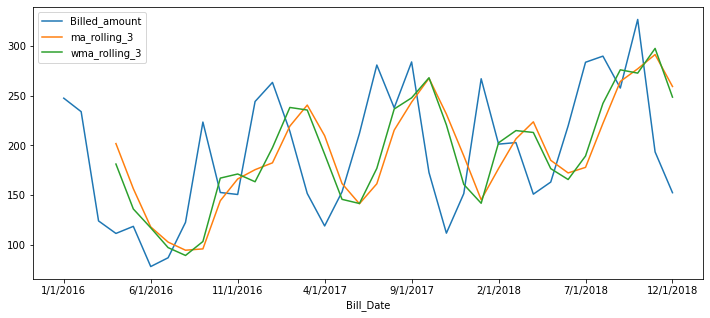

In [37]:
bill_2018.plot()

### Exponential Moving Average

exponential moving average=(Close-previous EMA)*(2/(span+1))+previous EMA

In [40]:
bill_2018['Billed_amount'].ewm(span=3,adjust=False, min_periods=0).mean()

Bill_Date
1/1/2016     247.730000
2/1/2016     240.920000
3/1/2016     182.385000
4/1/2016     146.802500
5/1/2016     132.586250
6/1/2016     105.198125
7/1/2016      95.934063
8/1/2016     109.167031
9/1/2016     166.393516
10/1/2016    159.466758
11/1/2016    155.003379
12/1/2016    199.686689
1/1/2017     231.663345
2/1/2017     222.991672
3/1/2017     187.265836
4/1/2017     153.027918
5/1/2017     153.103959
6/1/2017     182.591980
7/1/2017     231.890990
8/1/2017     234.930495
9/1/2017     259.615247
10/1/2017    216.152624
11/1/2017    163.831312
12/1/2017    157.625656
1/1/2018     212.472828
2/1/2018     206.911414
3/1/2018     204.910707
4/1/2018     177.885353
5/1/2018     170.477677
6/1/2018     195.118838
7/1/2018     239.549419
8/1/2018     264.849710
9/1/2018     261.404855
10/1/2018    294.297427
11/1/2018    243.893714
12/1/2018    198.116857
Name: Billed_amount, dtype: float64

In [65]:
bill_2018['ema_window_3']=bill_2018['Billed_amount'].ewm(span=3,adjust=False, min_periods=0).mean().shift(1)
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ema_rolling_3,esm_window_3_7,esm_window_3_3,ema_window_3
Bill_Date,,,,,,,
1/1/2016,247.73,NaN,NaN,NaN,NaN,NaN,NaN
2/1/2016,234.11,NaN,NaN,247.730000,NaN,NaN,247.730000
3/1/2016,123.85,NaN,NaN,240.920000,NaN,NaN,240.920000
4/1/2016,111.22,201.896667,181.250000,182.385000,158.153800,207.705800,182.385000
5/1/2016,118.37,156.393333,135.911667,146.802500,125.300140,178.760060,146.802500
6/1/2016,77.81,117.813333,116.900000,132.586250,120.449042,160.643042,132.586250
7/1/2016,86.67,102.466667,96.898333,105.198125,90.601713,135.793129,105.198125
8/1/2016,122.40,94.283333,89.000000,95.934063,87.849514,121.056191,95.934063
9/1/2016,223.62,95.626667,103.058333,109.167031,112.034854,121.459333,109.167031


<AxesSubplot:xlabel='Bill_Date'>

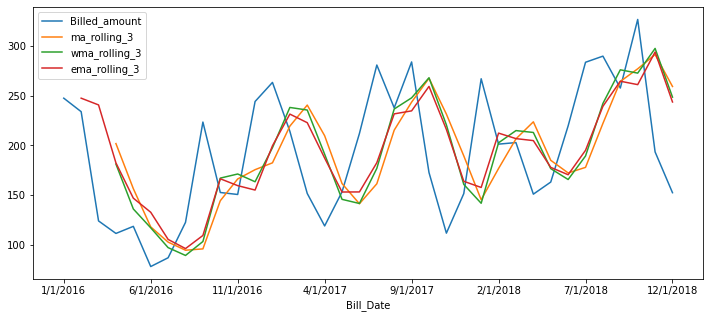

In [43]:
bill_2018.plot()

### Exponential Smoothing Average
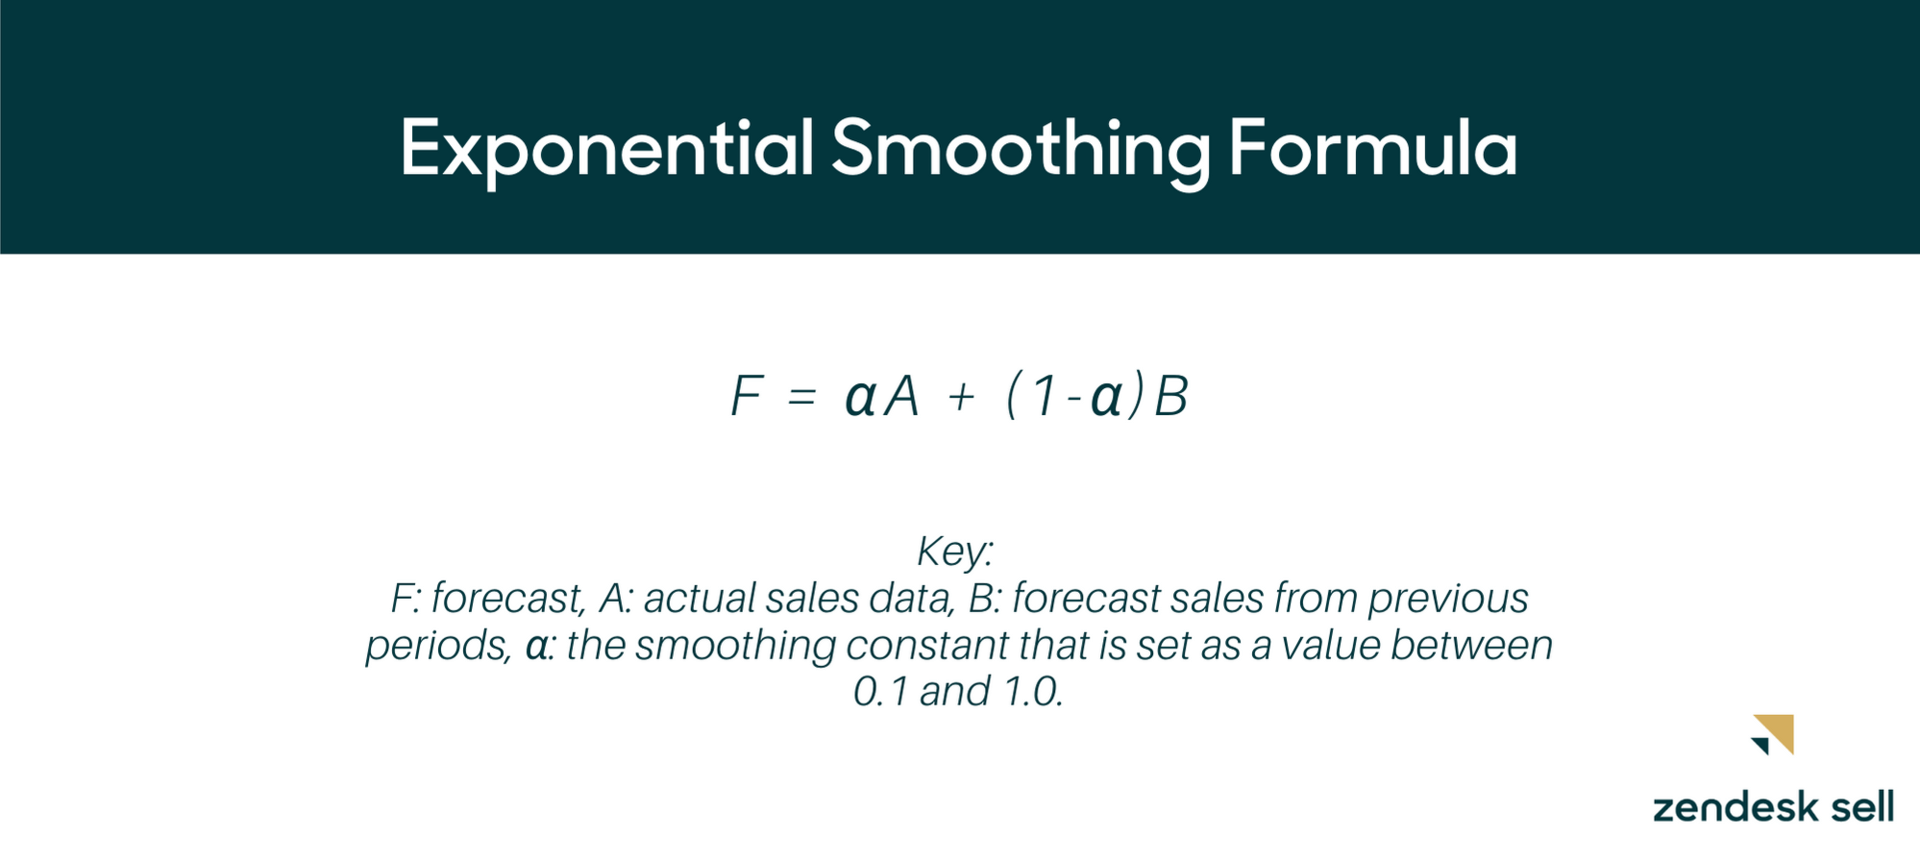

In [44]:
bill_2018['Billed_amount'].ewm(alpha=0.7,adjust=False,min_periods=3).mean()

Bill_Date
1/1/2016            NaN
2/1/2016            NaN
3/1/2016     158.153800
4/1/2016     125.300140
5/1/2016     120.449042
6/1/2016      90.601713
7/1/2016      87.849514
8/1/2016     112.034854
9/1/2016     190.144456
10/1/2016    163.821337
11/1/2016    154.524401
12/1/2016    217.416320
1/1/2017     249.772896
2/1/2017     224.955869
3/1/2017     173.564761
4/1/2017     135.222428
5/1/2017     147.792728
6/1/2017     192.793819
7/1/2017     254.671146
8/1/2017     242.980344
9/1/2017     271.904103
10/1/2017    202.454231
11/1/2017    138.793269
12/1/2017    147.631981
1/1/2018     231.413594
2/1/2018     210.369078
3/1/2018     205.147723
4/1/2018     167.146317
5/1/2018     164.292895
6/1/2018     203.119869
7/1/2018     259.721961
8/1/2018     281.021588
9/1/2018     264.878476
10/1/2018    308.496543
11/1/2018    227.991963
12/1/2018    175.035589
Name: Billed_amount, dtype: float64

In [48]:
bill_2018['esm_window_3_7']=bill_2018['Billed_amount'].ewm(alpha=0.7,adjust=False,min_periods=3).mean().shift(1)
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ema_rolling_3,esm_window_3_7
Bill_Date,,,,,
1/1/2016,247.73,NaN,NaN,NaN,NaN
2/1/2016,234.11,NaN,NaN,247.730000,NaN
3/1/2016,123.85,NaN,NaN,240.920000,NaN
4/1/2016,111.22,201.896667,181.250000,182.385000,158.153800
5/1/2016,118.37,156.393333,135.911667,146.802500,125.300140
6/1/2016,77.81,117.813333,116.900000,132.586250,120.449042
7/1/2016,86.67,102.466667,96.898333,105.198125,90.601713
8/1/2016,122.40,94.283333,89.000000,95.934063,87.849514
9/1/2016,223.62,95.626667,103.058333,109.167031,112.034854


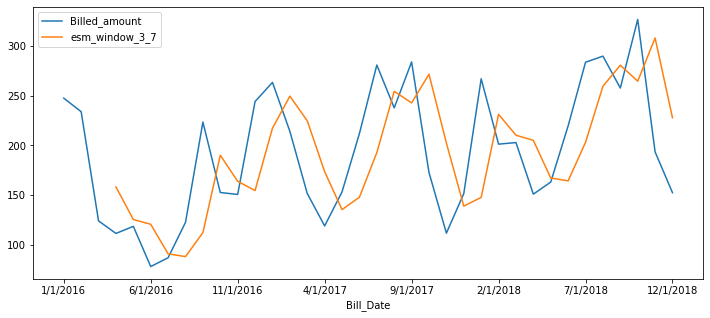

In [49]:
bill_2018[['Billed_amount','esm_window_3_7']].plot();

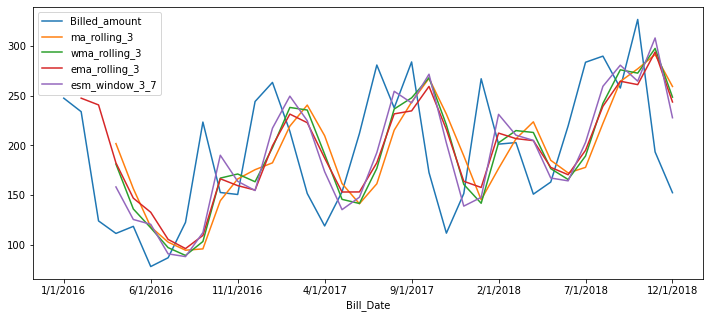

In [50]:
bill_2018.plot();

In [51]:
#use alpha=0.3
bill_2018['Billed_amount'].ewm(alpha=0.3,adjust=False,min_periods=3).mean()

Bill_Date
1/1/2016            NaN
2/1/2016            NaN
3/1/2016     207.705800
4/1/2016     178.760060
5/1/2016     160.643042
6/1/2016     135.793129
7/1/2016     121.056191
8/1/2016     121.459333
9/1/2016     152.107533
10/1/2016    152.237273
11/1/2016    151.728091
12/1/2016    179.520664
1/1/2017     204.756465
2/1/2017     207.625525
3/1/2017     190.799868
4/1/2017     169.196907
5/1/2017     164.391835
6/1/2017     178.698285
7/1/2017     209.445799
8/1/2017     218.003059
9/1/2017     237.892142
10/1/2017    218.331499
11/1/2017    186.285049
12/1/2017    175.825535
1/1/2018     203.273874
2/1/2018     202.696712
3/1/2018     202.760698
4/1/2018     187.190489
5/1/2018     179.954342
6/1/2018     191.896040
7/1/2018     219.521228
8/1/2018     240.709859
9/1/2018     245.884902
10/1/2018    270.276431
11/1/2018    247.240502
12/1/2018    218.770351
Name: Billed_amount, dtype: float64

In [52]:
bill_2018['esm_window_3_3']=bill_2018['Billed_amount'].ewm(alpha=0.3,adjust=False,min_periods=3).mean().shift(1)
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ema_rolling_3,esm_window_3_7,esm_window_3_3
Bill_Date,,,,,,
1/1/2016,247.73,NaN,NaN,NaN,NaN,NaN
2/1/2016,234.11,NaN,NaN,247.730000,NaN,NaN
3/1/2016,123.85,NaN,NaN,240.920000,NaN,NaN
4/1/2016,111.22,201.896667,181.250000,182.385000,158.153800,207.705800
5/1/2016,118.37,156.393333,135.911667,146.802500,125.300140,178.760060
6/1/2016,77.81,117.813333,116.900000,132.586250,120.449042,160.643042
7/1/2016,86.67,102.466667,96.898333,105.198125,90.601713,135.793129
8/1/2016,122.40,94.283333,89.000000,95.934063,87.849514,121.056191
9/1/2016,223.62,95.626667,103.058333,109.167031,112.034854,121.459333


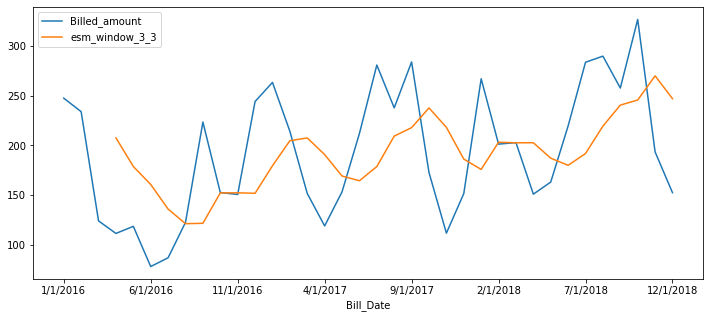

In [53]:
bill_2018[['Billed_amount','esm_window_3_3']].plot();

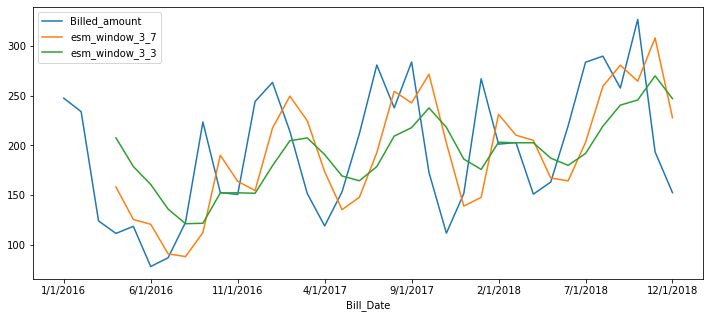

In [55]:
bill_2018[['Billed_amount','esm_window_3_7','esm_window_3_3']].plot();

In [64]:
bill_2018.head()

,Billed_amount,ma_rolling_3,wma_rolling_3,ema_rolling_3,esm_window_3_7,esm_window_3_3
Bill_Date,,,,,,
1/1/2016,247.73,NaN,NaN,NaN,NaN,NaN
2/1/2016,234.11,NaN,NaN,247.7300,NaN,NaN
3/1/2016,123.85,NaN,NaN,240.9200,NaN,NaN
4/1/2016,111.22,201.896667,181.250000,182.3850,158.15380,207.70580
5/1/2016,118.37,156.393333,135.911667,146.8025,125.30014,178.76006


### RMS to to check Model Accuracy, Lower the RMS greater tham Model.

In [58]:
((bill_2018['Billed_amount']-bill_2018['ma_rolling_3'])**2).mean()**0.5

70.98561687433802

In [59]:
((bill_2018['Billed_amount']-bill_2018['wma_rolling_3'])**2).mean()**0.5

65.82572602256133

In [67]:
((bill_2018['Billed_amount']-bill_2018['ema_window_3'])**2).mean()**0.5

64.32131239414655

In [68]:
((bill_2018['Billed_amount']-bill_2018['esm_window_3_7'])**2).mean()**0.5

61.26408398853503

In [69]:
((bill_2018['Billed_amount']-bill_2018['esm_window_3_3'])**2).mean()**0.5

65.22424423118377